# MAT-classification: Analysis and Classification methods for Multiple Aspect Trajectory Data Mining \[MAT-Tools Framework\]

Sample Code in python notebook to use mat-classification as a python library.

The present package offers a tool, to support the user in the task of data analysis of multiple aspect trajectories. It integrates into a unique framework for multiple aspects trajectories and in general for multidimensional sequence data mining methods.

Created on Dec, 2023
Copyright (C) 2023, License GPL Version 3 or superior (see LICENSE file)

In [ ]:
!pip3 install mat-classification

## 1. Loading data
To use helpers for data pre-processing, import from package `matdata` (dependency: [mat-data](https://github.com/ttportela/mat-data)):

### 1.1. Loading a sample data
    a) Lets start by loading FoursquareNYC data:
(For other preprocessing functions, check the docs: https://mat-analysis.github.io/mat-tools/

In [1]:
from matdata.dataset import load_ds

dataset='mat.FoursquareNYC'

data = load_ds(dataset, missing='-999')
data

Loading dataset file: https://github.com/mat-analysis/datasets/tree/main/mat/FoursquareNYC/


  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 1055k  100 1055k    0     0  1890k      0 --:--:-- --:--:-- --:--:-- 1908k


,space,time,day,poi,type,root_type,rating,weather,tid,label
0,40.8331652006224 -73.9418603427692,317,Monday,The Lair Of Modern Strange Cowboy,Home (private),Residence,-1.0,Clear,126,6
1,40.8340978041072 -73.9452672225881,1404,Monday,Galaxy Gourmet Deli,Deli / Bodega,Food,8.2,Clouds,126,6
2,40.8331652006224 -73.9418603427692,0,Tuesday,The Lair Of Modern Strange Cowboy,Home (private),Residence,-1.0,Clouds,126,6
3,40.7646959283254 -73.8851974964414,1069,Thursday,Popeyes Louisiana Kitchen,Fried Chicken Joint,Food,6.6,Clear,126,6
4,40.7660790376824 -73.8835287094116,1120,Thursday,MTA Bus Operations Depot - LaGuardia,Bus Station,Travel & Transport,-1.0,Clear,126,6
...,...,...,...,...,...,...,...,...,...,...
66941,40.7047332789043 -73.9877378940582,1037,Friday,Miami Ad School Brooklyn,General College & University,College & University,-1.0,Clouds,29563,1070
66942,40.6951627360199 -73.9954478691072,1210,Friday,Lantern Thai Kitchen,Thai Restaurant,Food,8.0,Clouds,29563,1070
66943,40.6978026652822 -73.9941451630314,481,Saturday,Eastern Athletic Club,Gym,Outdoors & Recreation,6.9,Clouds,29563,1070
66944,40.6946728967503 -73.9940820360805,819,Saturday,Starbucks,Coffee Shop,Food,7.0,Clouds,29563,1070


In [2]:
from matdata.preprocess import klabels_stratify
train, test = klabels_stratify(data, kl=5)

train.label.unique(), '--', len(train.tid.unique()), len(test.tid.unique())

Spliting Data (class-balanced):   0%|          | 0/5 [00:00<?, ?it/s]

Sorting data:   0%|          | 0/5 [00:00<?, ?it/s]

Sorting data:   0%|          | 0/5 [00:00<?, ?it/s]

(array([ 84, 164, 181, 390, 768]), '--', 56, 28)

### 1.2. Saving and Conversions
    b) Saving trajectories:

In [ ]:
import pandas as pd
train.to_parquet(f'sample/data/{dataset.split(".")[1]}/train.parquet', index=False)
test.to_parquet(f'sample/data/{dataset.split(".")[1]}/test.parquet', index=False)

Also, we can save using the converter functions (which provide more options), in other formats for other input types of methods:

In [ ]:
from matdata.converter import df2csv, df2zip, df2parquet

# Saving as csv:
df2csv(train, f'sample/data/{dataset.split(".")[1]}', 'train')
df2csv(test, f'sample/data/{dataset.split(".")[1]}', 'test')

# Saving as zip (containing trajectory type of files):
df2zip(train, f'sample/data/{dataset.split(".")[1]}', 'train')
df2zip(test, f'sample/data/{dataset.split(".")[1]}', 'test')

# Saving as parquet (override):
df2parquet(train, f'sample/data/{dataset.split(".")[1]}', 'train')
df2parquet(test, f'sample/data/{dataset.split(".")[1]}', 'test')

# Check docs:
help(df2parquet)

Then, experiment with a classifier.

## 2. Classification Methods

TODO

- `prepare_input(train, test)` => `model.train()` => `model.test()`
- `model.fit(X_train, y_train, X_val, y_val)` => `model.predict(X_test, y_test)`

### 2.1. Trajectory Based Methods

TODO

#### 2.1.1. MARC

TODO

In [ ]:
from matclassification.methods import MARC

model = MARC()
model.prepare_input(train, test)
model.train()
model.test()
## We can visualize the training report (the same on most models):
model.report

In [ ]:
# and this is the model available metrics:
model.summary()

In [ ]:
# Plot Confusion Matrix:
model.cm()

Or, you can repeat the classification in a number of rounds with increasing random seed:

In [ ]:
model.test(rounds=3)

In [ ]:
## We can visualize the test report (the same on most models):
model.test_report

In [ ]:
# And show the mean results
model.summary()

You may want to use the classifier in a traditional way:

In [ ]:
from matclassification.methods import MARC

model = MARC()

# Each classifier expect a ceirtain input format. If you want to change, check the 'xy' method:
(keys, vocab_size, num_classes, max_length, le, x_train, x_test, y_train, y_test) = model.xy(train, test)

# You can add method variables with this:
model.add_config(keys=keys, 
                 vocab_size=vocab_size,
                 num_classes=num_classes,
                 max_length=max_length)
model.le = le # The label encoder

# Run the classifier:
model.fit(x_train, y_train, x_test, y_test)

summary, y_pred = model.predict(x_test, y_test)

In [ ]:
summary

#### 2.1.2. POI-Sequences (extention of POI-Frequency)

In [3]:
from matclassification.methods import POIS

sequences = [1] # Sequence sizes to use, example, for 1, 2 or 3 points use: [1, 2, 3] 
features = ['poi'] # Features to build frequency matrix combined with sequence sizes, 
                   # by default selects the feature with higher variance
# method='npoi' # you can pass the extract method

model = POIS('npoi', sequences, features)
model.prepare_input(train, test)
model.train()
model.test()


[NPOI:] Building model
5 5 False
5 5 False
[POIS:] Starting feature extractor ... 
- Feature: poi, Sequence: 1
Starting NPOI...
[POIS:] Processing time: 24.002 milliseconds. Done.
------------------------------------------------------------------------------------------------
[NPOI:] Training hiperparameter model
Metal device set to: Apple M1
===== Training Epoch 1 =====


2024-06-09 15:04:22.671706: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2024-06-09 15:04:22.671795: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)
2024-06-09 15:04:22.781453: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
2024-06-09 15:04:23.022850: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2024-06-09 15:04:23.220408: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


2/2 [==============================] - 0s 8ms/step
TRAIN		acc: 0.339286	acc_top5: 1.000000	f1_macro: 0.314762	prec_macro: 0.349825	rec_macro: 0.318019
1/1 [==============================] - 0s 11ms/step
TEST		acc: 0.250000	acc_top5: 1.000000	f1_macro: 0.238974	prec_macro: 0.275000	rec_macro: 0.248571
===== Training Epoch 2 =====
2/2 [==============================] - 0s 2ms/step
TRAIN		acc: 0.678571	acc_top5: 1.000000	f1_macro: 0.650667	prec_macro: 0.652747	rec_macro: 0.656494
1/1 [==============================] - 0s 7ms/step
TEST		acc: 0.535714	acc_top5: 1.000000	f1_macro: 0.512967	prec_macro: 0.526667	rec_macro: 0.517143
===== Training Epoch 3 =====
2/2 [==============================] - 0s 2ms/step


2024-06-09 15:04:23.305735: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


TRAIN		acc: 0.928571	acc_top5: 1.000000	f1_macro: 0.915397	prec_macro: 0.912698	rec_macro: 0.919643
1/1 [==============================] - 0s 8ms/step
TEST		acc: 0.714286	acc_top5: 1.000000	f1_macro: 0.656667	prec_macro: 0.650000	rec_macro: 0.664286
===== Training Epoch 4 =====
2/2 [==============================] - 0s 2ms/step
TRAIN		acc: 0.982143	acc_top5: 1.000000	f1_macro: 0.977719	prec_macro: 0.986667	rec_macro: 0.971429
1/1 [==============================] - 0s 8ms/step
TEST		acc: 0.785714	acc_top5: 1.000000	f1_macro: 0.753571	prec_macro: 0.777778	rec_macro: 0.742857
===== Training Epoch 5 =====
2/2 [==============================] - 0s 2ms/step
TRAIN		acc: 1.000000	acc_top5: 1.000000	f1_macro: 1.000000	prec_macro: 1.000000	rec_macro: 1.000000
1/1 [==============================] - 0s 7ms/step
TEST		acc: 0.857143	acc_top5: 1.000000	f1_macro: 0.806984	prec_macro: 0.927273	rec_macro: 0.800000
===== Training Epoch 6 =====
2/2 [==============================] - 0s 2ms/step
TRAIN		acc

Model Testing:   0%|          | 0/1 [00:00<?, ?it/s]

===== Training Epoch 1 =====


2024-06-09 15:04:27.310858: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2024-06-09 15:04:27.458574: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


2/2 [==============================] - 0s 6ms/step
TRAIN		acc: 0.517857	acc_top5: 1.000000	f1_macro: 0.510627	prec_macro: 0.504970	rec_macro: 0.525162
1/1 [==============================] - 0s 11ms/step
TEST		acc: 0.535714	acc_top5: 1.000000	f1_macro: 0.498974	prec_macro: 0.526429	rec_macro: 0.515714
===== Training Epoch 2 =====
2/2 [==============================] - 0s 2ms/step
TRAIN		acc: 0.821429	acc_top5: 1.000000	f1_macro: 0.808552	prec_macro: 0.802167	rec_macro: 0.823214
1/1 [==============================] - 0s 8ms/step
TEST		acc: 0.750000	acc_top5: 1.000000	f1_macro: 0.707778	prec_macro: 0.710000	rec_macro: 0.716429
===== Training Epoch 3 =====
2/2 [==============================] - 0s 2ms/step


2024-06-09 15:04:27.529092: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


TRAIN		acc: 0.964286	acc_top5: 1.000000	f1_macro: 0.954986	prec_macro: 0.960000	rec_macro: 0.957143
1/1 [==============================] - 0s 7ms/step
TEST		acc: 0.892857	acc_top5: 1.000000	f1_macro: 0.832778	prec_macro: 0.915556	rec_macro: 0.850000
===== Training Epoch 4 =====
2/2 [==============================] - 0s 2ms/step
TRAIN		acc: 1.000000	acc_top5: 1.000000	f1_macro: 1.000000	prec_macro: 1.000000	rec_macro: 1.000000
1/1 [==============================] - 0s 8ms/step
TEST		acc: 0.892857	acc_top5: 1.000000	f1_macro: 0.844706	prec_macro: 0.940000	rec_macro: 0.850000
===== Training Epoch 5 =====
2/2 [==============================] - 0s 2ms/step
TRAIN		acc: 1.000000	acc_top5: 1.000000	f1_macro: 1.000000	prec_macro: 1.000000	rec_macro: 1.000000
1/1 [==============================] - 0s 8ms/step
TEST		acc: 0.892857	acc_top5: 1.000000	f1_macro: 0.844706	prec_macro: 0.940000	rec_macro: 0.850000
===== Training Epoch 6 =====
2/2 [==============================] - 0s 2ms/step
TRAIN		acc

(        acc  acc_top_K5  balanced_accuracy  precision_macro  recall_macro  \
 0  0.928571         1.0                0.9         0.908333      0.955556   
 
    f1_macro   cls_time  
 0       0.9  10393.023  ,
 array([[9.86939192e-01, 5.10711269e-03, 3.90173797e-03, 6.44403917e-04,
         3.40754562e-03],
        [9.01734054e-01, 3.44225354e-02, 2.82153841e-02, 1.37928789e-02,
         2.18351111e-02],
        [9.13322926e-01, 3.50455046e-02, 2.34118849e-02, 1.18214581e-02,
         1.63982138e-02],
        [9.61652458e-01, 1.48669872e-02, 1.17285028e-02, 3.77437961e-03,
         7.97766075e-03],
        [8.40293348e-01, 5.00207134e-02, 5.32868020e-02, 2.54507121e-02,
         3.09483800e-02],
        [8.95924509e-01, 3.14413980e-02, 3.41718830e-02, 1.71764344e-02,
         2.12858003e-02],
        [8.82790565e-01, 3.12659182e-02, 3.54368091e-02, 1.40276607e-02,
         3.64789665e-02],
        [8.63656640e-01, 3.94147933e-02, 4.01393771e-02, 1.73572563e-02,
         3.94319445e-02

In [5]:
model.summary()

,acc,acc_top_K5,balanced_accuracy,precision_macro,recall_macro,f1_macro,cls_time
0,0.928571,1.0,0.9,0.908333,0.955556,0.9,10645.658


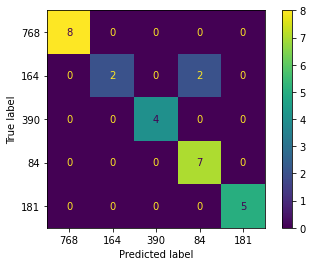

In [10]:
# Plot Confusion Matrix:
model.cm()

If you want to use just the feature extractor, you can check `poifreq` submodule:

In [ ]:
from matclassification.methods.feature.feature_extraction.pois import pois

sequences = [1,2,3]
features = ['poi']
method='npoi' # default: 'npoi', or, 'poi' and 'wnpoi'

x_train, x_test, y_train, y_test, _ = pois(train, test, sequences, features, method, 
                                           result_dir='./sample/results/pois', save_all=True) # And we save the results

display(x_train)

In [17]:
from matclassification.methods.feature.feature_extraction.pois import pois

sequences = [1]
features = ['poi']
method='npoi' # default: 'npoi', or, 'poi' and 'wnpoi'

x_train, x_test, y_train, y_test, _ = pois(train, test, sequences, features, method, 
                                           result_dir='./sample/results/pois', save_all=True) # And we save the results

display(x_train)

[POIS:] Starting feature extractor ... 
- Feature: poi, Sequence: 1
Starting NPOI...
[POIS:] Processing time: 85.184 milliseconds. Done.
------------------------------------------------------------------------------------------------


,0,1,2,3,4,5,6,7,8,9,...,570,571,572,573,574,575,576,577,578,579
0,0.024390,0.073171,0.048780,0.02439,0.024390,0.024390,0.024390,0.024390,0.048780,0.024390,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,0.000000,0.027778,0.037037,0.00000,0.009259,0.027778,0.009259,0.009259,0.037037,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,0.000000,0.021505,0.000000,0.00000,0.000000,0.000000,0.000000,0.021505,0.000000,0.010753,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,0.000000,0.000000,0.020833,0.00000,0.000000,0.020833,0.020833,0.000000,0.041667,0.020833,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,0.015385,0.046154,0.030769,0.00000,0.000000,0.000000,0.000000,0.015385,0.046154,0.046154,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.000000,0.017241,0.000000,0.00000,0.000000,0.000000,0.000000,0.017241,0.051724,0.034483,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
6,0.000000,0.046512,0.023256,0.00000,0.000000,0.000000,0.000000,0.000000,0.046512,0.023256,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
7,0.000000,0.042553,0.021277,0.00000,0.000000,0.000000,0.000000,0.000000,0.042553,0.063830,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
8,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.015152,0.015152,0.060606,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
9,0.000000,0.000000,0.057143,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


And then you can create the classifier (another way of using the classifier classes in the classical way):

In [7]:
from matclassification.methods.feature.POIS import POIS, prepareData

sequences = [1]
features = ['poi']

# POIS method have a method for data transformation:
num_features, num_classes, labels, X, y, one_hot_y = prepareData(x_train, x_test, y_train, y_test)
x_train, x_test = X
y_train, y_test = y

# Create the classifier:
model = POIS('npoi', sequences, features)

# Model Label Encoder:
model.le = one_hot_y

# You can add method variables with this:
model.add_config(num_features=num_features,
                num_classes=num_classes, 
                labels=labels)

# Run the classifier:
model.fit(x_train, y_train, x_test, y_test)

summary, y_pred = model.predict(x_test, y_test)


[NPOI:] Building model
===== Training Epoch 1 =====


2024-06-09 15:06:39.535141: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2024-06-09 15:06:39.681270: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


2/2 [==============================] - 0s 6ms/step
TRAIN		acc: 0.446429	acc_top5: 1.000000	f1_macro: 0.442836	prec_macro: 0.449610	rec_macro: 0.472727
1/1 [==============================] - 0s 11ms/step
TEST		acc: 0.464286	acc_top5: 1.000000	f1_macro: 0.412521	prec_macro: 0.411111	rec_macro: 0.442857
===== Training Epoch 2 =====
2/2 [==============================] - 0s 2ms/step
TRAIN		acc: 0.750000	acc_top5: 1.000000	f1_macro: 0.742804	prec_macro: 0.748702	rec_macro: 0.789773
1/1 [==============================] - 0s 9ms/step
TEST		acc: 0.750000	acc_top5: 1.000000	f1_macro: 0.742634	prec_macro: 0.764286	rec_macro: 0.766429
===== Training Epoch 3 =====
2/2 [==============================] - 0s 2ms/step


2024-06-09 15:06:39.751124: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


TRAIN		acc: 0.892857	acc_top5: 1.000000	f1_macro: 0.896732	prec_macro: 0.890620	rec_macro: 0.910065
1/1 [==============================] - 0s 9ms/step
TEST		acc: 0.857143	acc_top5: 1.000000	f1_macro: 0.858608	prec_macro: 0.900000	rec_macro: 0.875000
===== Training Epoch 4 =====
2/2 [==============================] - 0s 2ms/step
TRAIN		acc: 0.964286	acc_top5: 1.000000	f1_macro: 0.963795	prec_macro: 0.961667	rec_macro: 0.969318
1/1 [==============================] - 0s 7ms/step
TEST		acc: 0.964286	acc_top5: 1.000000	f1_macro: 0.958095	prec_macro: 0.975000	rec_macro: 0.950000
===== Training Epoch 5 =====
2/2 [==============================] - 0s 2ms/step
TRAIN		acc: 0.982143	acc_top5: 1.000000	f1_macro: 0.983580	prec_macro: 0.986667	rec_macro: 0.981818
1/1 [==============================] - 0s 7ms/step
TEST		acc: 0.964286	acc_top5: 1.000000	f1_macro: 0.958095	prec_macro: 0.975000	rec_macro: 0.950000
===== Training Epoch 6 =====
2/2 [==============================] - 0s 2ms/step
TRAIN		acc

In [8]:
summary

,acc,acc_top_K5,balanced_accuracy,precision_macro,recall_macro,f1_macro
0,0.928571,1.0,0.9,0.908333,0.955556,0.9


The next classifiers use Hiperparameter Optimization (class derrived from `HPSClassifier`), thus we first call `model.train()` to test model configurations to look for the best model.

#### 2.1.3. DeepeST

TODO

In [ ]:
from matclassification.methods import DeepeST

model = DeepeST()
model.prepare_input(train, test)
model.train()
model.test()

In [ ]:
model.summary()

#### 2.1.4. Trajectory Random Forrest (TRF)

TODO

In [ ]:
from matclassification.methods import TRF

model = TRF()
model.prepare_input(train, test)
model.train()
model.test()

In [ ]:
model.summary()

In [ ]:
model.cm()

#### 2.1.5. Trajectory XGBoost (TXGB)

TODO

In [ ]:
from matclassification.methods import TXGB

model = TXGB()
model.prepare_input(train, test)
model.train()
model.test()

In [ ]:
model.summary()

#### 2.1.6. BITULER

TODO

In [ ]:
from matclassification.methods import Bituler

model = Bituler()
model.prepare_input(train, test, features=['poi'])
model.train()
model.test()

In [ ]:
model.summary()

#### 2.1.7. TULVAE

TODO

In [ ]:
from matclassification.methods import Tulvae

model = Tulvae()
model.prepare_input(train, test, features=['poi'])
model.train()
model.test()

In [ ]:
model.summary()

### 2.2. Movelet Based Methods

Movelet base methods .... TODO

Let's start by extracting movelets from the train and test data, so we save the data:

In [ ]:
from matdata.converter import df2csv

data_path = 'sample/data/FoursquareNYC'

df2csv(train, data_path, 'train')
df2csv(test, data_path, 'test')
#test.to_csv('sample/data/FoursquareNYC/test.csv', index=False)

In [ ]:
from matdata.converter import df2parquet

data_path = 'sample/data/FoursquareNYC'

df2parquet(train, data_path, 'train')
df2parquet(test, data_path, 'test')

a) First, we can apply a method for movelets extraction like [HiPerMovelets](https://github.com/bigdata-ufsc/HiPerMovelets), for example configuration:

In [1]:
!java -Xmx7G -jar "./sample/programs/MoveletDiscovery.jar" \
-curpath "./sample/data/FoursquareNYC" \
-respath "./sample/results/hiper" \
-descfile "./sample/data/FoursquareNYC/FoursquareNYC.json" \
-nt 1 -version hiper -ms -1 -Ms -3 -TC 1d

Sun Jun 09 16:55:54 BRT 2024
log4j:WARN No appenders could be found for logger (org.apache.hadoop.util.Shell).
log4j:WARN Please initialize the log4j system properly.
log4j:WARN See http://logging.apache.org/log4j/1.2/faq.html#noconfig for more info.
Starting Movelets +Log extractor 
Configurations:
   -curpath		Datasets directory:	./sample/data/FoursquareNYC
   -respath		Results directory: 	./sample/results/hiper/Movelets/HIPER_Log_FoursquareNYC_LSP_ED
   -descfile 		Description file : 	./sample/data/FoursquareNYC/FoursquareNYC.json
+-------------+--------------------+---------------------+----------------------------------------------+
| Option      | Description        | Value               | Help                                         |
+-------------+--------------------+---------------------+----------------------------------------------+
| -nt         | Allowed Threads    | 1                   |                                              |
| -ms         | Min size           |

b) Concatenate the feature files (created by label) containing the movelets matrix into one train.csv and one test.csv:

In [ ]:
!python3 scripts/helpers/MAT-MergeDatasets.py ./sample/results/hiper

In [ ]:
import pandas as pd
movelets_train = pd.read_csv('./sample/results/hiper/train.csv')
movelets_test = pd.read_csv('./sample/results/hiper/test.csv')

Next, let's use the movelets for classification ...

#### 2.2.1. Movelet Multi-Layer Perceptron (MMLP)

TODO

*In this case we don´t need `model.train()` to train models for finding the best configuration parameters. Because the model use movelets, those are already the most discriminant patterns in data. Thus, the neural network was already tunned to this type of input.

In [ ]:
from matclassification.methods import MMLP

model = MMLP()
model.prepare_input(movelets_train, movelets_test)
model.train() 
model.test()

In [ ]:
model.summary()

In [ ]:
model.cm()

In [ ]:
# This is another version, without hiper-parameter search:
from matclassification.methods.feature.MoveletMLP import MMLP1

model = MMLP1()
model.prepare_input(movelets_train, movelets_test)
model.train()
model.test()
model.summary()

#### 2.2.2. Movelet Random Forrest (MRF)

TODO

In [ ]:
from matclassification.methods import MRF

model = MRF()
model.prepare_input(movelets_train, movelets_test)
model.train() 
model.test()

In [ ]:
model.summary()

In [ ]:
model.cm()

#### 2.2.3. Movelet Random Forrest with HiperParameter Search (MRFHP)

TODO

In [ ]:
from matclassification.methods import MRFHP

model = MRFHP()
model.prepare_input(movelets_train, movelets_test)
model.train()
model.test()

In [ ]:
model.summary()

#### 2.2.4. Movelet Support Vector Machine (MSCV)

TODO

In [ ]:
from matclassification.methods import MSVC

model = MSVC()
model.prepare_input(movelets_train, movelets_test)
model.train()
model.test()

In [ ]:
model.summary()

#### 2.2.5. Movelet Decision Tree (MDT)

TODO

In [ ]:
from matclassification.methods import MDT

model = MDT()
model.prepare_input(movelets_train, movelets_test)
model.train()
model.test()

In [ ]:
model.summary()

In [ ]:
fig = model.plot_tree()

In [ ]:
model.graph_tree()

---
## 3. Scripts

The scripts provided with this package for using some of the library functions in command line environment.

### 3.1. Classifications Methods

In [ ]:
# Only the MARC classifier:
!python3 scripts/cls/MARC.py 'sample/data/FoursquareNYC/train.csv' 'sample/data/FoursquareNYC/test.csv' 'sample/results'

In [1]:
!python3 scripts/cls/MAT-TC.py --help

usage: MAT-MC.py [-h] [-c CLASSIFIERS] [-m MODELFOLDER] [-r RANDOM]
                 results-path

MAT Movelets Classification

positional arguments:
  results-path          path for the results folder

optional arguments:
  -h, --help            show this help message and exit
  -c CLASSIFIERS, --classifiers CLASSIFIERS
                        classifiers methods
  -m MODELFOLDER, --modelfolder MODELFOLDER
                        model folder
  -r RANDOM, --random RANDOM
                        random seed


In [ ]:
# Methods for trajectory input (includes MARC):
!python3 scripts/cls/MAT-TC.py 'sample/data/FoursquareNYC' 'sample/results' -c 'TRF,TXGB,Tulvae,Bituler,MARC,DeepeST'

In [ ]:
# Methods for movelets input:
!python3 scripts/cls/MAT-MC.py 'sample/results/hiper' -c 'MDT,MMLP,MRF,MSVC,MRFHP'

In [ ]:
# For POI-S classification of sequence sizes concatenated (it does feature extraction):
!python3 scripts/cls/POIS-TC.py 'sample/data/FoursquareNYC' 'sample/results'

In [ ]:
# For POI-S for feature extraction:
!python3 scripts/features/POIS.py 'sample/data/FoursquareNYC' 'sample/results'

In [ ]:
# Optionally, for POI-S feature extraction AND classification (it classify each sequence size alone and all sizes concatenated):
!python3 scripts/features/POIS.py 'sample/data/FoursquareNYC' 'sample/results' --classify

### 3.3. Helpers for Experimental Results:

b) Concatenate the feature files (created by label) containing the movelets matrix into one train.csv and one test.csv:

In [2]:
!python3 scripts/helpers/MAT-MergeDatasets.py ./sample/results/hiper

Loading files - train.csv
Writing train.csv file
Done.
Loading files - test.csv
Writing test.csv file
Done.


In [6]:
!python3 scripts/helpers/MAT-Summary.py ./sample/results/hiper

Done.


In [21]:
import os
import glob2 as glob
def getResultFiles(res_path, patterns = []):
    def findFiles(x):
        search = os.path.join(res_path, '**', x)
        return list(glob.glob(search, recursive=True))
#        fl = []
#        for files in glob.glob(search, recursive=True):
#            fileName, fileExtension = os.path.splitext(files)
#            fl.append(files) #filename with extension
#        return fl
       
    filesList = sum(list(map(lambda p: findFiles(p), patterns)), [])

    # Second add the remaining:
#    filesList = filesList + findFiles('model_*_summary.csv') # NN / RF / SVM
#    filesList = filesList + findFiles('*-*.txt') # NN / RF / SVM
#    filesList = filesList + findFiles('classification_times.csv') # NN / RF / SVM
#    filesList = filesList + findFiles('poifreq_results.txt') # POI-F / POI-FS
#    #filesList = filesList + findFiles('MARC-*.txt') # MARC
#    filesList = filesList + findFiles('model_approachEnsemble_history.csv') # TEC
#    filesList = filesList + findFiles('TEC*/*.txt') # TEC
    
    filesList = list(set(filesList))
    
    filesList = list(filter(lambda file: 'POI' not in os.path.basename(file).split('-')[0], filesList))
    
    filesList.sort()
    
    return filesList

getResultFiles('sample/results', ['model_*_summary.csv', 'model_*_history.csv'])

['sample/results/hiper/model/model_mdt_summary.csv',
 'sample/results/hiper/model/model_mmlp_history.csv',
 'sample/results/hiper/model/model_mmlp_summary.csv',
 'sample/results/hiper/model/model_mrf_summary.csv',
 'sample/results/hiper/model/model_mrfhp_history.csv',
 'sample/results/hiper/model/model_mrfhp_summary.csv',
 'sample/results/hiper/model/model_msvc_summary.csv']

In [18]:
from matview.scripting.component._base import BaseMethod

#dict(map(lambda cls: (cls.__name__, cls), BaseMethod.__subclasses__()))
BaseMethod.__subclasses__()

ModuleNotFoundError: No module named 'matview'

---
# Extras

I) if we want to read and prepare the movelets feature matrix splitting into: train, validation and text sets:

In [ ]:
import pandas as pd

# Splitting the train data into train and validation 
df_train = pd.read_csv('./sample/results/train.csv')
df_train['tid'] = df_train.index

from matdata.preprocess import trainAndTestSplit
df_train, df_val = trainAndTestSplit(df_train, train_size=0.75, tid_col='tid', class_col='class', outformats=[])
df_train.drop(columns=['tid'], inplace=True)
df_val.drop(columns=['tid'], inplace=True)

df_train.to_csv('sample/results/train_1.csv', index=False)
df_val.to_csv('sample/results/train_2.csv', index=False)

In [ ]:
# Reading the movelet data:
from matclassification.methods import read_features_csv
X_train, y_train = read_features_csv('./sample/results', 'train_1.csv')
X_val, y_val = read_features_csv('./sample/results', 'train_2.csv')
X_test, y_test = read_features_csv('./sample/results', 'test.csv')

And, use it in a classifier:

In [ ]:
from matclassification.methods import MDT

model = MDT()
model.fit(X_train, y_train, X_val, y_val)
model.predict(X_test, y_test)

model.summary()

---
### That's all, thanks!

\# By Tarlis Portela (2023)